===== TRAINING DATA BEFORE LABEL REMOVAL =====
     Departures  Domestic  International  FlagCarrier_Flights      Area
85         6559        12           6547                    0   Pacific
68         1101         0           1101                 1888    Europe
113        4782       270           4512                 9739      Asia
188       84862     43311          41551               137868    Europe
33       482663    389070          93593               499365  Americas 

===== TESTING DATA BEFORE LABEL REMOVAL =====
     Departures  Domestic  International  FlagCarrier_Flights      Area
210        1999         0           1999                    0  Americas
219       96704     76147          20557               102696    Africa
142        6432      3807           2625                 6293    Africa
182       17331         1          17330                15359    Europe
17         3204       556           2648                 3519    Africa 

===== TRAINING FEATURES =====
     Depa

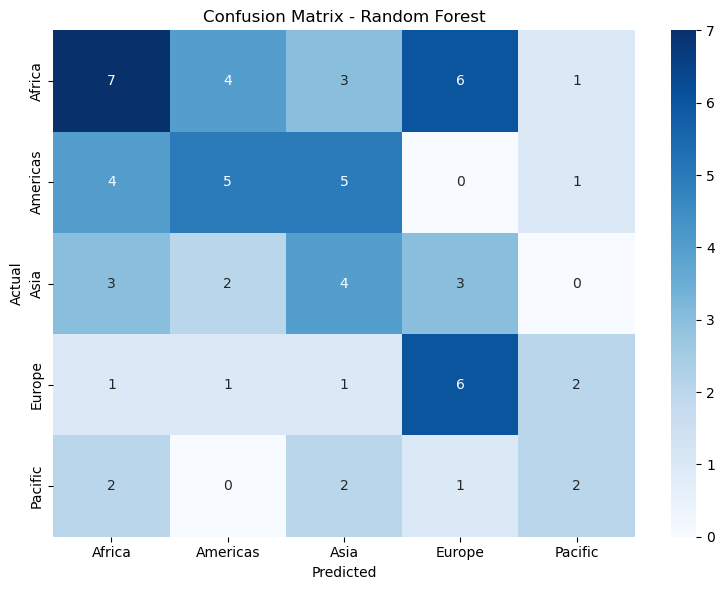

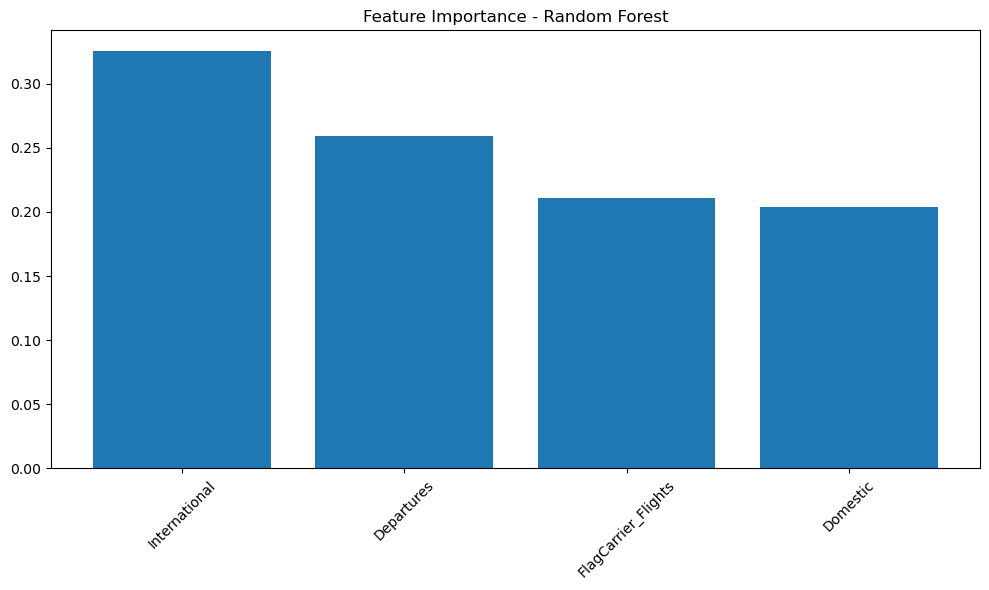

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

# Load and clean data
DF = pd.read_csv("cleaned_departures_development_traffic1.csv")
DF = DF.drop(columns=["Name", "Development_Level", "Traffic"])
DF = DF[~DF["Area"].isin(["High", "Low", "Medium"])]

# Split into training and testing
DF_Train, DF_Test = train_test_split(DF, test_size=0.30, random_state=42)

print("===== TRAINING DATA BEFORE LABEL REMOVAL =====")
print(DF_Train.head(), "\n")

print("===== TESTING DATA BEFORE LABEL REMOVAL =====")
print(DF_Test.head(), "\n")

# Separate labels and features
TrainLabel = DF_Train["Area"]
TestLabel = DF_Test["Area"]

DF_Train = DF_Train.drop(["Area"], axis=1)
DF_Test = DF_Test.drop(["Area"], axis=1)

print("===== TRAINING FEATURES =====")
print(DF_Train.head(), "\n")

print("===== TESTING FEATURES =====")
print(DF_Test.head(), "\n")

# Train Random Forest model
RF_Model = RandomForestClassifier(n_estimators=100, random_state=42)
RF_Model.fit(DF_Train, TrainLabel)

# Predict
Predicted_Labels = RF_Model.predict(DF_Test)

# Classification report
print("===== CLASSIFICATION REPORT =====")
print(classification_report(TestLabel, Predicted_Labels))

# Confusion matrix
ClassNames = sorted(TestLabel.unique())
Conf_Mat = confusion_matrix(TestLabel, Predicted_Labels, labels=ClassNames)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Conf_Mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=ClassNames, yticklabels=ClassNames)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix_rf.png")
plt.show()

# Feature Importance
importances = RF_Model.feature_importances_
features = DF_Train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), features[indices], rotation=45)
plt.tight_layout()
plt.savefig("feature_importance_rf.png")
plt.show()
